In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [5]:
X_train /= 255.0
X_test /= 255.0

In [6]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [7]:
#functional api
inputs = Input(shape=input_shape)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(inputs)
x = MaxPooling2D()(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, 3, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
outputs = Dense(10, activation='softmax')(x)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model = Model(inputs=inputs, outputs=outputs)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0   

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
history = model.fit(X_train,
                   y_train,
                   epochs=5)

Epoch 1/5
60000/60000 [==============================] - 59s 976us/step - loss: 0.1667 - accuracy: 0.9472
Epoch 2/5
60000/60000 [==============================] - 59s 980us/step - loss: 0.0539 - accuracy: 0.9833
Epoch 3/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0414 - accuracy: 0.9866
Epoch 4/5
60000/60000 [==============================] - 59s 978us/step - loss: 0.0334 - accuracy: 0.9892
Epoch 5/5
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0264 - accuracy: 0.9919


In [12]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 299us/step


[0.022875118794682202, 0.9925000071525574]

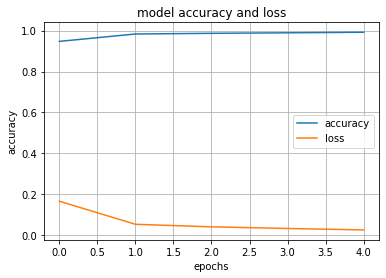

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title('model accuracy and loss')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.grid()
plt.show()

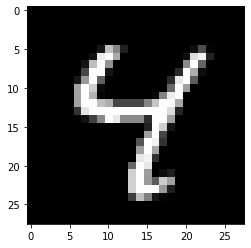

4

In [14]:
plt.imshow(X_test[6].reshape(28,28), 'gray')
plt.show()
pred = model.predict(X_test[6].reshape(1,28,28,1))
pred.argmax()